In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load up the data, copy the keys into variables
data = np.load('starDensity_i_nside_64.npz')
# Cumulative number counts, units of stars/sq deg. Array at healpix locations
starDensity = data['starDensity'].copy()
# magnitude bins 
bins=data['bins'].copy()
# pixels where there were so many stars some were skipped
mask = data['overMaxMask']

In [3]:
# Generate the ra, dec array from healpy
nside = hp.npix2nside(np.size(mask))
lat,ra = hp.pix2ang(nside, np.arange(np.size(mask)))
dec = np.pi/2-lat

In [4]:
log_starDensity = np.log10(starDensity)

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [5]:
# The log10 denisty to look to.
Goal_denisty = 6.1

In [6]:
depth_map = np.zeros(hp.nside2npix(nside), dtype=float)
for i,ack in enumerate(depth_map):
    good = np.where(log_starDensity[i] < Goal_denisty)[0]
    if np.size(good) > 0:
        depth_map[i] = bins[np.max(good)]

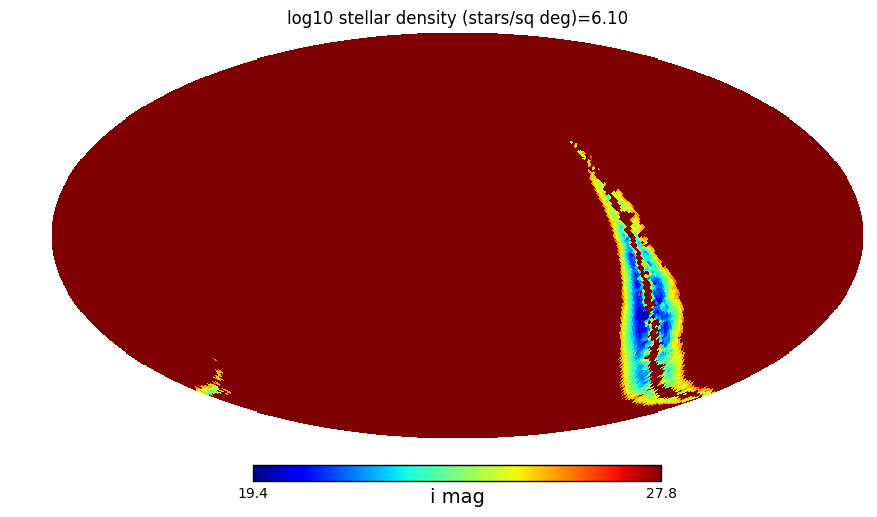

In [7]:
hp.mollview(depth_map, title='log10 stellar density (stars/sq deg)=%.2f' % Goal_denisty, unit='i mag')